# Towards a Conflict Heuristic (DH 2023)

## 11. Conflict Arcs

Last updated: 10.07.2023

julian.haeussler[at]tu-darmstadt.de

In [1]:
# imports

import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

In [2]:
# load files

df_VPs_Romantik_core = pd.read_csv('../Analyseergebnisse/csv/230420_df_VPs_Romantik_core.csv', index_col=0)

In [3]:
len(df_VPs_Romantik_core)

250857

In [4]:
df_VPs_Romantik_core.head()

,phrase_tokenized,phrase_lemmatized,mean_val_adj,mean_aro_adj,mean_ep_adj,mean_val_noun,mean_aro_noun,mean_ep_noun,mean_conf_dornseiff,mean_conf_annotation,novel_title,novel_beg,novel_end,phrase_pos
0,"['dem', 'schutzgeist', 'bleibt', 'ein', 'treue...","['der', 'schutzgeist', 'bleiben', 'einen', 'tr...",-0.008388,0.007577,-0.000145,0.007036,0.224101,0.006323,0.004102,-0.016558,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",0,17602,0
1,"['so', 'ward', 'auch', 'mir', 'ein', 'hochgese...","['so', 'ward', 'auch', 'sich', 'einen', 'hochg...",0.000133,-0.000132,-0.000119,0.007223,0.257948,0.005676,-0.007146,-0.024458,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",0,17602,1
2,"['wo', 'sich', 'die', 'worte', 'leicht', 'zum'...","['wo', 'sich', 'der', 'wort', 'leicht', 'zum',...",-0.000316,-0.002302,-0.000048,0.009215,0.211023,0.005506,-0.019410,-0.033575,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",0,17602,2
3,"['mein', 'lied', 'und', 'ich', 'wir', 'bleiben...","['mein', 'lied', 'und', 'ich', 'ich', 'bleiben...",-0.002559,-0.011589,-0.000559,0.013513,0.267624,0.006237,0.006048,-0.022191,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",0,17602,3
4,"['der', 'uns', 'hat', 'durch', 'melodie', 'gew...","['der', 'sich', 'haben', 'durch', 'melodie', '...",0.021854,0.004098,-0.000289,-0.004865,0.249832,0.006091,-0.008013,-0.029408,"Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Bu...",0,17602,4


In [5]:
dict_VPs_Romantik_core = df_VPs_Romantik_core.to_dict('records')

In [6]:
dict_VPs_Romantik_core[0]

{'phrase_tokenized': "['dem', 'schutzgeist', 'bleibt', 'ein', 'treuer', 'sinn', 'ergeben', 'der', 'ihn', 'erhob', 'aus', 'einer', 'dunklen', 'zeit', 'auf', 'lichten', 'flügeln', 'singend', 'hinzuschweben']",
 'phrase_lemmatized': "['der', 'schutzgeist', 'bleiben', 'einen', 'treu', 'sinn', 'ergeben', 'der', 'ich', 'erheben', 'aus', 'einer', 'dunkel', 'zeit', 'auf', 'lichten', 'flügel', 'singen', 'hinzuschweben']",
 'mean_val_adj': -0.008387515027272,
 'mean_aro_adj': 0.0075771208656461,
 'mean_ep_adj': -0.000145320673124,
 'mean_val_noun': 0.0070360972216927,
 'mean_aro_noun': 0.224100820314055,
 'mean_ep_noun': 0.0063228484231888,
 'mean_conf_dornseiff': 0.0041019798240117,
 'mean_conf_annotation': -0.0165583518214691,
 'novel_title': 'Arnim_Achim_von_Armut,_Reichtum,_Schuld_und_Busse_der_Graefin_Dolores',
 'novel_beg': 0,
 'novel_end': 17602,
 'phrase_pos': 0}

In [7]:
len(dict_VPs_Romantik_core)

250857

In [8]:
# get list of titles

lst_titles = []

lst_files = glob.glob(os.path.join(os.getcwd(), '../Daten/Romantik (abgeschlossen)/TXT/Kernkorpus', '*.txt'))

for entry in lst_files:
    lst_titles.append(re.search(r"(?<=Kernkorpus\\)(.*)(?=.txt)",entry).group(1))

In [9]:
len(lst_titles)

26

In [10]:
# create dictionary of titles and corresponding VPs

dict_novels_Romantik_core = {}

for title in lst_titles:
    lst_entries = []
    for i in range(0,len(dict_VPs_Romantik_core)):
        if dict_VPs_Romantik_core[i]['novel_title'] == title:
            lst_entries.append(dict_VPs_Romantik_core[i])
    dict_novels_Romantik_core[title] = lst_entries

In [11]:
len(dict_novels_Romantik_core)

26

In [12]:
# create dictionary of titles and lists of values

dict_values_raw_Romantik_core = {}

for title in lst_titles:
    lst_values = []
    for entry in dict_novels_Romantik_core[title]:
        lst_values.append(entry['mean_conf_dornseiff'])
    dict_values_raw_Romantik_core[title] = lst_values

In [13]:
# create dictionary of titles and list of moving average values

dict_mov_avrg_50_cos_Romantik_core = {}

for title in lst_titles:
    lst_values = []
    for entry in dict_novels_Romantik_core[title]:
        lst_values.append(entry['mean_conf_dornseiff'])
    series_values = pd.Series(lst_values)
    series_mov_avrg = series_values.rolling(50, win_type='cosine').mean()
    dict_mov_avrg_50_cos_Romantik_core[title] = series_mov_avrg.tolist()[50 - 1:]

In [14]:
dict_mov_avrg_100_cos_Romantik_core = {}

for title in lst_titles:
    lst_values = []
    for entry in dict_novels_Romantik_core[title]:
        lst_values.append(entry['mean_conf_dornseiff'])
    series_values = pd.Series(lst_values)
    series_mov_avrg = series_values.rolling(100,win_type='cosine').mean()
    dict_mov_avrg_100_cos_Romantik_core[title] = series_mov_avrg.tolist()[100 - 1:]

In [15]:
lst_titles[14]

'Klingemann_August_Die_Nachtwachen_des_Bonaventura'

In [16]:
lst_titles[5]

'Eichendorff_Joseph_von_Ahnung_und_Gegenwart'

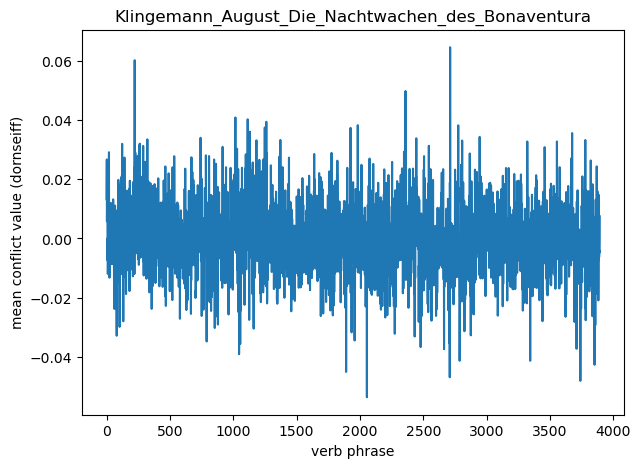

In [19]:
# get conflict arc

l = dict_values_raw_Romantik_core[lst_titles[14]]
xs = [x for x in range(len(l))]

fig = plt.figure(figsize=(7,5))

plt.plot(xs, l)
plt.title(lst_titles[14])
plt.xlabel('verb phrase')
plt.ylabel('mean conflict value (dornseiff)')
plt.show()

fig.savefig('../Analyseergebnisse/png/Klingemann_Nachtwachen_conflict_raw.png', dpi=300, bbox_inches = 'tight')

In [20]:
dict_novels_Romantik_core['Klingemann_August_Die_Nachtwachen_des_Bonaventura'][222]

{'phrase_tokenized': "['der', 'donner', 'brüllte', 'zürnend']",
 'phrase_lemmatized': "['der', 'donner', 'brüllen', 'zürnen']",
 'mean_val_adj': -0.0581060796976089,
 'mean_aro_adj': 0.0424740025773644,
 'mean_ep_adj': 0.0025694654551353,
 'mean_val_noun': -0.0023776142724922,
 'mean_aro_noun': 0.209768560548712,
 'mean_ep_noun': 0.0037041044193214,
 'mean_conf_dornseiff': 0.060186903613309,
 'mean_conf_annotation': 0.0380280133868966,
 'novel_title': 'Klingemann_August_Die_Nachtwachen_des_Bonaventura',
 'novel_beg': 125386,
 'novel_end': 129279,
 'phrase_pos': 222}

In [21]:
dict_novels_Romantik_core['Klingemann_August_Die_Nachtwachen_des_Bonaventura'][2712]

{'phrase_tokenized': "['heulen', 'die', 'pfaffen']",
 'phrase_lemmatized': "['heulen', 'der', 'pfaffe']",
 'mean_val_adj': -0.0564338757346073,
 'mean_aro_adj': -0.0017009290556112,
 'mean_ep_adj': 0.0001743332198191,
 'mean_val_noun': -0.0281966870739346,
 'mean_aro_noun': 0.2181423409354118,
 'mean_ep_noun': 0.0061338076441916,
 'mean_conf_dornseiff': 0.064573882975512,
 'mean_conf_annotation': 0.0574998906680515,
 'novel_title': 'Klingemann_August_Die_Nachtwachen_des_Bonaventura',
 'novel_beg': 125386,
 'novel_end': 129279,
 'phrase_pos': 2712}

In [22]:
dict_novels_Romantik_core['Klingemann_August_Die_Nachtwachen_des_Bonaventura'][2055]

{'phrase_tokenized': "['worin', 'es', 'sich', 'bewunderte']",
 'phrase_lemmatized': "['worin', 'ich', 'sich', 'bewundern']",
 'mean_val_adj': 0.0180889749899506,
 'mean_aro_adj': 0.0307347774505615,
 'mean_ep_adj': 0.0011951383057753,
 'mean_val_noun': 0.0184354849425809,
 'mean_aro_noun': 0.2650084184881832,
 'mean_ep_noun': 0.0090655100423355,
 'mean_conf_dornseiff': -0.0536180132767185,
 'mean_conf_annotation': -0.0347733648094747,
 'novel_title': 'Klingemann_August_Die_Nachtwachen_des_Bonaventura',
 'novel_beg': 125386,
 'novel_end': 129279,
 'phrase_pos': 2055}

In [23]:
dict_novels_Romantik_core['Klingemann_August_Die_Nachtwachen_des_Bonaventura'][2709]

{'phrase_tokenized': "['bilden', 'die', 'philosophen', 'systeme']",
 'phrase_lemmatized': "['bilden', 'der', 'philosoph', 'system']",
 'mean_val_adj': -0.0013917535543441,
 'mean_aro_adj': 0.0105594568885862,
 'mean_ep_adj': 0.0001740950923692,
 'mean_val_noun': 0.0020675827882119,
 'mean_aro_noun': 0.2126023811288178,
 'mean_ep_noun': 0.003360645237137,
 'mean_conf_dornseiff': -0.0468786420533433,
 'mean_conf_annotation': 0.0024900498933025,
 'novel_title': 'Klingemann_August_Die_Nachtwachen_des_Bonaventura',
 'novel_beg': 125386,
 'novel_end': 129279,
 'phrase_pos': 2709}

In [24]:
dict_novels_Romantik_core['Klingemann_August_Die_Nachtwachen_des_Bonaventura'][3740]

{'phrase_tokenized': "['denn', 'ich', 'sehe', 'bloß', 'leichten', 'duft']",
 'phrase_lemmatized': "['denn', 'ich', 'sehen', 'bloß', 'leicht', 'duft']",
 'mean_val_adj': 0.0047841384075582,
 'mean_aro_adj': 0.0088816367400189,
 'mean_ep_adj': 0.0002835749314725,
 'mean_val_noun': -0.0021982596654977,
 'mean_aro_noun': 0.2164056840868267,
 'mean_ep_noun': 0.0022827498603332,
 'mean_conf_dornseiff': -0.0480993916539268,
 'mean_conf_annotation': -0.0445281636457712,
 'novel_title': 'Klingemann_August_Die_Nachtwachen_des_Bonaventura',
 'novel_beg': 125386,
 'novel_end': 129279,
 'phrase_pos': 3740}

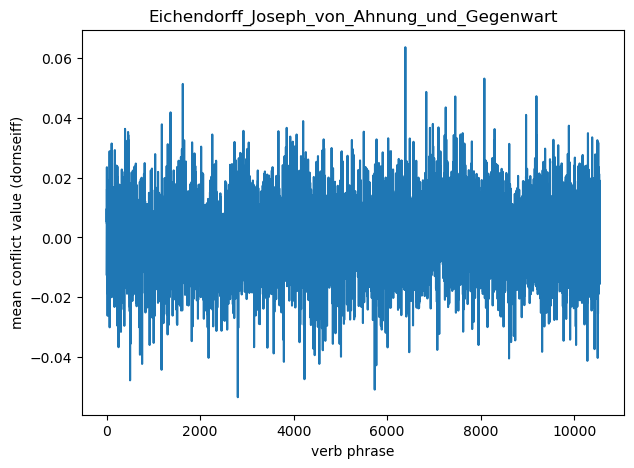

In [25]:
l = dict_values_raw_Romantik_core[lst_titles[5]]
xs = [x for x in range(len(l))]

fig = plt.figure(figsize=(7,5))

plt.plot(xs, l)
plt.title(lst_titles[5])
plt.xlabel('verb phrase')
plt.ylabel('mean conflict value (dornseiff)')
plt.show()

fig.savefig('../Analyseergebnisse/png/Eichendorff_Ahnung_conflict_raw.png', dpi=300, bbox_inches = 'tight')

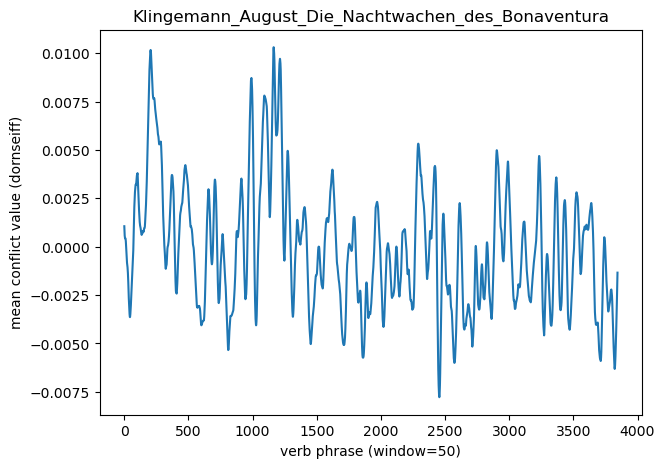

In [26]:
# get conflict arc to test moving average value

l = dict_mov_avrg_50_cos_Romantik_core[lst_titles[14]]
xs = [x for x in range(len(l))]

fig = plt.figure(figsize=(7,5))

plt.plot(xs, l)
plt.title(lst_titles[14])
plt.xlabel('verb phrase (window=50)')
plt.ylabel('mean conflict value (dornseiff)')
plt.show()

fig.savefig('../Analyseergebnisse/png/Klingemann_Nachtwachen_conflict_window_50.png', dpi=300, bbox_inches = 'tight')

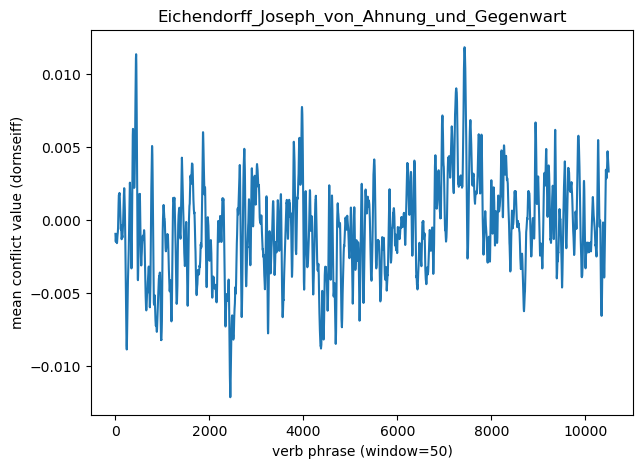

In [27]:
l = dict_mov_avrg_50_cos_Romantik_core[lst_titles[5]]
xs = [x for x in range(len(l))]

fig = plt.figure(figsize=(7,5))

plt.plot(xs, l)
plt.title(lst_titles[5])
plt.xlabel('verb phrase (window=50)')
plt.ylabel('mean conflict value (dornseiff)')
plt.show()

fig.savefig('../Analyseergebnisse/png/Eichendorff_Ahnung_conflict_window_50.png', dpi=300, bbox_inches = 'tight')

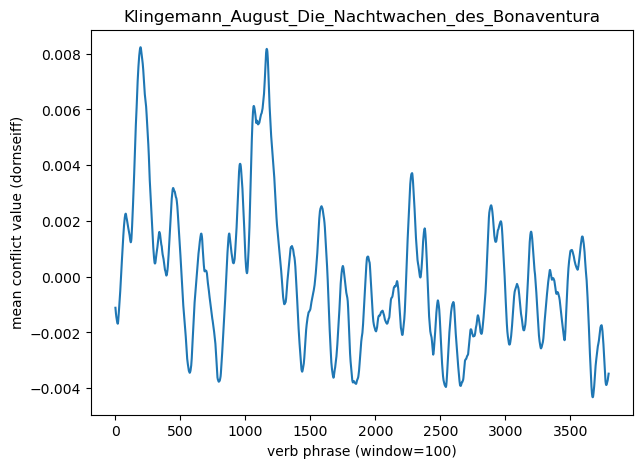

In [28]:
l = dict_mov_avrg_100_cos_Romantik_core[lst_titles[14]]
xs = [x for x in range(len(l))]

fig = plt.figure(figsize=(7,5))

plt.plot(xs, l)
plt.title(lst_titles[14])
plt.xlabel('verb phrase (window=100)')
plt.ylabel('mean conflict value (dornseiff)')
plt.show()

fig.savefig('../Analyseergebnisse/png/Klingemann_Nachtwachen_conflict_window_100.png', dpi=300, bbox_inches = 'tight')

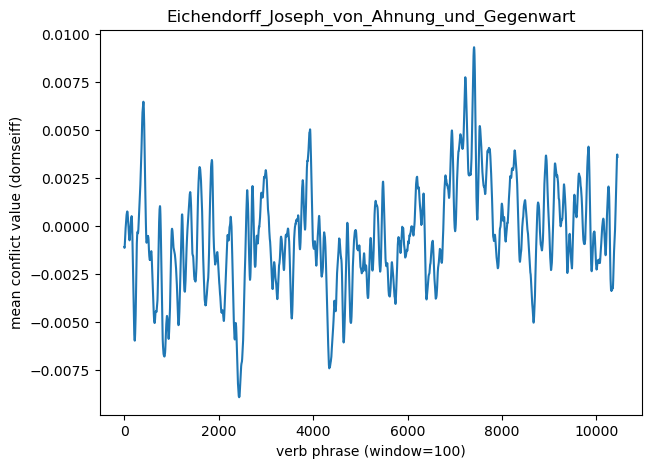

In [29]:
l = dict_mov_avrg_100_cos_Romantik_core[lst_titles[5]]
xs = [x for x in range(len(l))]

fig = plt.figure(figsize=(7,5))

plt.plot(xs, l)
plt.title(lst_titles[5])
plt.xlabel('verb phrase (window=100)')
plt.ylabel('mean conflict value (dornseiff)')
plt.show()

fig.savefig('../Analyseergebnisse/png/Eichendorff_Ahnung_conflict_window_100.png', dpi=300, bbox_inches = 'tight')

In [30]:
# average no. of VPs, longest + shortest novel

print('Mean amount of verb phrases in a novel: ' + str(len(dict_VPs_Romantik_core)/len(lst_titles))+'.')

Mean amount of verb phrases in a novel: 9648.346153846154.


In [31]:
dict_lens = {}

for title in lst_titles:
    dict_lens[title] = len(dict_novels_Romantik_core[title])

In [32]:
len(dict_lens)

26

In [33]:
novel = sorted(dict_lens, key=dict_lens.get, reverse=True)[0]
print('Longest novel is '+novel+' with '+str(dict_lens[novel])+' verb phrases.')

Longest novel is Paul_Jean_Hesperus_oder_45_Hundsposttage with 22033 verb phrases.


In [34]:
novel = sorted(dict_lens, key=dict_lens.get, reverse=False)[0]
print('Shortest novel is '+novel+' with '+str(dict_lens[novel])+' verb phrases.')

Shortest novel is Hoelderlin_Friedrich_Fragment_von_Hyperion with 783 verb phrases.


Ressources used:

https://www.geeksforgeeks.org/how-to-calculate-moving-averages-in-python/ (last viewed: 10.07.2023)